<a href="https://colab.research.google.com/github/sennycho/homework/blob/main/20230704%EC%9B%8C%EB%93%9C%EC%9E%84%EB%B2%A0%EB%94%A9_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제
[AI Hub](https://www.aihub.or.kr/)에 공개되어있는 한국어 도서 요약 데이터셋을 활용하여 한국어 워드 임베딩 구축


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [2]:
file = open('/content/drive/MyDrive/자연어처리/modi_output.txt', 'r')

In [3]:
data = file.read().splitlines()
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
len(data)

160004

In [5]:
data[0]

'자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다. 따라서 생각을 명료하게 정리하는 것이 명확한 글쓰기의 시작이다. 존 케네스 갈브레이드(John Kenneth Galbraith) 교수는 “아무리 복잡하고 어려운 주제라고 명쾌한 언어로 설명이 가능하다. 하지만 필자가 그 주제에 대해 완전히 이해하지 못하면 절대로 명확하게 쓸 수 없다.”고 했다. 명료한 글은 명료한 생각에서 나온다. 그렇지만 글을 고치다보면 생각도 명료하게 된다. 명료하게 쓰려면 내용을 단순화해야 한다. 많은 것을 전달하려는 욕심을 버리고 한두가지로 선택하고 거기 집중해야 한다. 앞에서 이야기한 간결성은 명확성에 도움이 된다. 명료함은 복잡한 설득기법을 사용하는 것보다 더 중요하다. 판사는 이해할 수 없는 사실관계 진술로는 설득되지 않는다. 설득기법이 명료함을 해치는 때에는 그 기법을 사용하지 않는다.\t주제가 아무리 복잡하고 어려울 지라도 필자가 주제에 대해 완벽하게 이해하고 있다면 명확한 글쓰기는 당연 가능하다. 명확한 글쓰기를 할 때 가장 중요한 점은 내용의 단순화 및 간결성이고 많은 것을 전달하려는 욕심을 버리는 것이다.'

In [6]:
df = pd.DataFrame({'document':data})
df

,document
0,자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다. 따라서 ...
1,진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...
2,"매우 최근 의견에서, Mary Footer는 이 논쟁을 한발 더 진전시켰다. 그녀는..."
3,에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 1981년에 비해 2배 ...
4,"강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품, 스포츠지식서비스, 의료..."
...,...
159999,유기성 폐기물 에너지화 시설 확대의 속성별 MWTP를 추정한 결과는 <표 5>에 제...
160000,일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...
160001,NCATS는 CTSA 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...
160002,해외 TA 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160004 entries, 0 to 160003
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  160004 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [8]:
df.replace('', float('NaN'), inplace=True)
print(df.isnull().values.any())
# False가 나옴 = 빈문자열 없음

False


In [9]:
# 열을 기준으로 중복된 데이터를 제거
processed_df= df.drop_duplicates(['document']).reset_index(drop=True)
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160004 entries, 0 to 160003
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  160004 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [10]:
# 데이터셋에 특수 문자를 제거
processed_df['document'] = processed_df['document'].str.replace('[^가-힣]', ' ')
processed_df

<ipython-input-10-6c36605af613>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  processed_df['document'] = processed_df['document'].str.replace('[^가-힣]', ' ')


,document
0,자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다 따라서 ...
1,진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...
2,매우 최근 의견에서 는 이 논쟁을 한발 더 진전시켰다 그녀는...
3,에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 년에 비해 배 ...
4,강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품 스포츠지식서비스 의료...
...,...
159999,유기성 폐기물 에너지화 시설 확대의 속성별 를 추정한 결과는 표 에 제...
160000,일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...
160001,는 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...
160002,해외 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...


In [11]:
# 전체 길이가 200 이하이거나 전체 단어 개수가 5개 이하인 데이터를 필터링
processed_df = processed_df[processed_df.document.apply(lambda x: len(str(x)) > 200 and len(str(x).split()) > 5)].reset_index(drop=True)
processed_df

,document
0,자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다 따라서 ...
1,진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...
2,매우 최근 의견에서 는 이 논쟁을 한발 더 진전시켰다 그녀는...
3,에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 년에 비해 배 ...
4,강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품 스포츠지식서비스 의료...
...,...
159995,유기성 폐기물 에너지화 시설 확대의 속성별 를 추정한 결과는 표 에 제...
159996,일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...
159997,는 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...
159998,해외 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...


In [12]:
!pip install mecab-python

In [13]:
!pip install konlpy

In [14]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [15]:
from konlpy.tag import Mecab

In [16]:
import requests
url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-ko/master/raw/ranksnl-korean.txt'
response = requests.get(url)
# print(response)
content = response.text
# print(content)
lines = content.split('\n')
print(lines)
print(len(lines))

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

In [17]:
# 조사 제거
mecab = Mecab()
def tokenizer_stopword_dic(s):
  nouns = mecab.nouns(s)
  return [noun for noun in nouns if noun not in lines]

In [18]:
# 데이터 셋에 불용어를 제외하여 띄어쓰기 단위로 문장을 분리
tokenized_doc = processed_df['document'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [s_word for s_word in  x if s_word not in lines])

In [19]:
tokenized_doc = tokenized_doc.to_list()

In [27]:
len(tokenized_doc)

160000

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
type(tokenized_doc)

list

In [22]:
# 토크나이저 객체, 토큰사전 구
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

In [23]:
word2idx = tokenizer.word_index
idx2word = {value: key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [24]:
vocab_size = len(word2idx) +1
print(f'단어사전크기: {vocab_size}')

단어사전크기: 1332503


In [25]:
print(encoded[0])

[164, 2329, 73489, 5078, 1812, 27839, 79809, 117, 398, 2329, 19881, 12958, 13, 1244, 59798, 56440, 7034, 162945, 615393, 4458, 4125, 6069, 245, 125092, 87467, 8592, 5430, 409, 13814, 4891, 31, 1355, 9049, 6158, 19882, 1555, 5787, 1, 83, 293, 199, 33996, 7081, 33996, 28946, 8352, 5170, 615394, 27839, 19881, 57, 19881, 208148, 212, 299536, 4, 39, 32, 91914, 52156, 13319, 393408, 7760, 70716, 14860, 4, 45295, 615395, 96901, 489, 57, 244568, 1258, 615396, 596, 3401, 23, 282, 12839, 1270, 1, 68, 23298, 182379, 244569, 244, 615397, 299537, 21688, 1076, 4381, 4282, 244, 7395, 4125, 6069, 1513, 52157, 13814, 4891, 31, 11270, 1430, 1043, 1244, 125093, 40166, 409, 1244, 68179, 11, 24, 62, 538, 1552, 25746, 615398, 39, 32, 91914, 52156, 18460, 5]


In [26]:
# 네거티브 샘플링을 위해 keras에서 제공하는 전처리 도구로 skipgrams사용
from tensorflow.keras.preprocessing.sequence import skipgrams

In [27]:
len(encoded)

160000

In [28]:
encoded[1]

[65870,
 220,
 487,
 3253,
 15718,
 32998,
 204,
 5056,
 44319,
 615399,
 96902,
 49520,
 27,
 2682,
 34541,
 533,
 1786,
 615400,
 11271,
 1398,
 29664,
 198,
 1129,
 88,
 71,
 15261,
 493,
 182380,
 6813,
 240,
 8264,
 272,
 11,
 1,
 3,
 5110,
 1607,
 10285,
 32,
 208149,
 649,
 112,
 2652,
 291,
 135231,
 750,
 2311,
 216,
 22,
 2063,
 26,
 121,
 170,
 6860,
 2,
 14273,
 91,
 703,
 487,
 1560,
 3,
 2109,
 102579,
 13,
 2616,
 28,
 43458,
 7761,
 26556,
 14924,
 680,
 20558,
 303,
 43,
 44319,
 477,
 125094,
 524,
 27,
 15261,
 2682,
 43,
 20920,
 437,
 1427,
 10766,
 5110,
 1607,
 10285,
 13,
 7274,
 5]

In [29]:
training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:1000]]

In [30]:
len(training_dataset)

1000

In [31]:
training_dataset[0]

([[1244, 701605],
  [5430, 4891],
  [91914, 883596],
  [125092, 311948],
  [244, 833605],
  [68, 1],
  [5078, 519267],
  [1812, 13],
  [57, 19881],
  [79809, 7034],
  [9049, 13814],
  [393408, 1086871],
  [52157, 915483],
  [19881, 1014026],
  [199, 1270004],
  [39, 14860],
  [1244, 619233],
  [245, 1200221],
  [96901, 843245],
  [1, 8352],
  [52157, 873846],
  [1430, 188196],
  [1270, 1116928],
  [299537, 1270],
  [615394, 19881],
  [1355, 293],
  [1244, 728280],
  [1076, 30511],
  [57, 32],
  [615396, 1273268],
  [87467, 4891],
  [83, 391955],
  [4381, 410601],
  [73489, 218325],
  [52156, 52183],
  [57, 5170],
  [409, 586620],
  [19881, 1093822],
  [7395, 211629],
  [5078, 845327],
  [1258, 288074],
  [596, 305389],
  [12958, 190462],
  [1555, 656275],
  [1270, 12839],
  [1552, 549030],
  [6069, 245],
  [2329, 73489],
  [5170, 199],
  [615398, 731634],
  [199, 6158],
  [615398, 409],
  [4125, 52157],
  [1258, 735848],
  [1555, 1033456],
  [27839, 299536],
  [4, 910783],
  [21688, 43

In [32]:
# tensorflow: 딥러닝, 머신러닝 모델을 만들 때 자료구조 텐서와 함수, 라이브러리 등을 갖고있는 라이브러리임

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [33]:
embedding_dim =100
# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1,), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)
# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [34]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs = [w_inputs, c_inputs], outputs = output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       133250300   ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       133250300   ['input_2[0][0]']                
                                                                                              

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam')

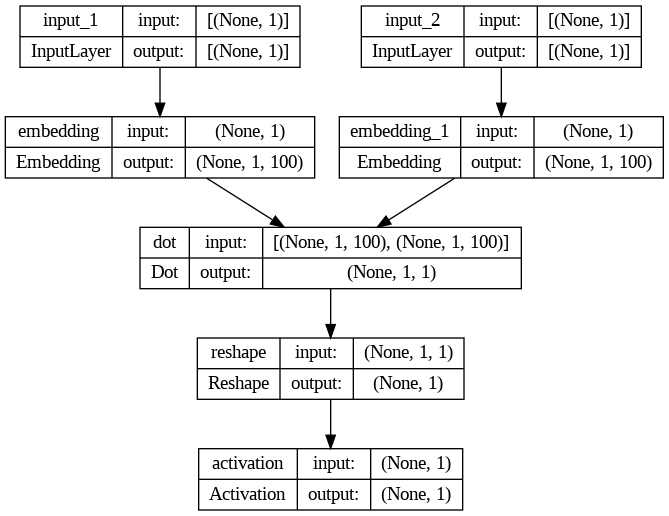

In [36]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [37]:
for epoch in range(50):
    loss = 0
    for _, elem in enumerate(training_dataset):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)
    print('Epoch:', epoch+1, 'Loss: ', loss)

Epoch: 1 Loss:  668.7307192087173
Epoch: 2 Loss:  514.5494200587273
Epoch: 3 Loss:  344.9412948936224
Epoch: 4 Loss:  237.14590598642826
Epoch: 5 Loss:  171.0222313851118
Epoch: 6 Loss:  128.24455382302403
Epoch: 7 Loss:  100.36682584509254
Epoch: 8 Loss:  82.28904341906309
Epoch: 9 Loss:  70.39780866727233
Epoch: 10 Loss:  62.196151707321405
Epoch: 11 Loss:  56.067935356870294
Epoch: 12 Loss:  51.02405349723995
Epoch: 13 Loss:  46.48202535510063
Epoch: 14 Loss:  42.114685194566846
Epoch: 15 Loss:  37.75880511663854
Epoch: 16 Loss:  33.35743336658925
Epoch: 17 Loss:  28.93203936237842
Epoch: 18 Loss:  24.565301697701216
Epoch: 19 Loss:  20.380065898410976
Epoch: 20 Loss:  16.51185281202197
Epoch: 21 Loss:  13.077991492580622
Epoch: 22 Loss:  10.155158723937348
Epoch: 23 Loss:  7.76846541732084
Epoch: 24 Loss:  5.893617802299559
Epoch: 25 Loss:  4.469033739820588
Epoch: 26 Loss:  3.416599578980822
Epoch: 27 Loss:  2.655293905758299
Epoch: 28 Loss:  2.113051644380903
Epoch: 29 Loss:  1.7

In [38]:
import gensim

In [39]:
f = open('vectors.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
# print(vectors)
for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [41]:
w2v.most_similar(positive=['세상'])

[('분쟁관계를', 0.9869741201400757),
 ('제조사', 0.9869476556777954),
 ('받아들이며', 0.986407458782196),
 ('사용자들을', 0.9856252074241638),
 ('달라지는', 0.9854450821876526),
 ('분권', 0.985363245010376),
 ('용역의', 0.9847187399864197),
 ('문제점이', 0.984497606754303),
 ('공고중단의', 0.9843928217887878),
 ('타산은', 0.9840843081474304)]